In [17]:
# Importando bibliotecas
import time
import struct
import filecmp
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [18]:
# Lendo arquivo
arqOriginal = open("disco.mp4", "rb").read()
arqOriginal = arqOriginal.decode('ISO-8859-1')

In [19]:
# Declarando parametros
k = []
rc = []
rcIdeal = []
tempoProc = []

In [20]:
# implementação do LZW
# COMPRESSOR
for K in range(9,17): # percorre os valores de K solicitados 9 a 16
    
    comeco = time.time()
    dicionario = {}
    novoValor = 256
    arqComprimido = []
    novo = ''
    velho = ''

    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i

    for letra in tqdm(arqOriginal):
        novo = velho + letra
        
        if novo.encode('ISO-8859-1') not in dicionario: 
            if len(dicionario) < 2**K:
                dicionario[novo.encode('ISO-8859-1')] = novoValor
                novoValor += 1
            
            numCod = dicionario[velho.encode('ISO-8859-1')]
            arqComprimido.append(numCod)
            velho = letra

        else:
            velho = novo

    numCod = dicionario[velho.encode('ISO-8859-1')]
    arqComprimido.append(numCod)
    
    final = time.time()
    
    outFile = open("saidaCompressao\saidaComprimida" + str(K) + ".mp4" , "wb")
    
    for i in arqComprimido:
        outFile.write(struct.pack('H', i))
        
    print('K = %d  ||  Tamanho: %d -> %d' %(K,len(arqOriginal),len(arqComprimido)))
    print('=======================================================================')

    rc.append(8/(len(arqComprimido) * 16 / len(arqOriginal))) 
    rcIdeal.append(8/(len(arqComprimido) * K / len(arqOriginal))) 
    
    tempoProc.append(final-comeco)
    
    outFile.close()

    k.append(K)

100%|██████████| 2111047/2111047 [00:03<00:00, 591329.66it/s]


K = 9  ||  Tamanho: 2111047 -> 2097699


100%|██████████| 2111047/2111047 [00:03<00:00, 599743.44it/s]


K = 10  ||  Tamanho: 2111047 -> 2090702


100%|██████████| 2111047/2111047 [00:03<00:00, 598840.74it/s]


K = 11  ||  Tamanho: 2111047 -> 2081530


100%|██████████| 2111047/2111047 [00:03<00:00, 604196.30it/s]


K = 12  ||  Tamanho: 2111047 -> 2069378


100%|██████████| 2111047/2111047 [00:03<00:00, 606601.84it/s]


K = 13  ||  Tamanho: 2111047 -> 1959288


100%|██████████| 2111047/2111047 [00:03<00:00, 610026.53it/s]


K = 14  ||  Tamanho: 2111047 -> 1772621


100%|██████████| 2111047/2111047 [00:03<00:00, 612301.77it/s]


K = 15  ||  Tamanho: 2111047 -> 1520385


100%|██████████| 2111047/2111047 [00:03<00:00, 625515.34it/s]


K = 16  ||  Tamanho: 2111047 -> 1289578


# Gerando Gráficos 

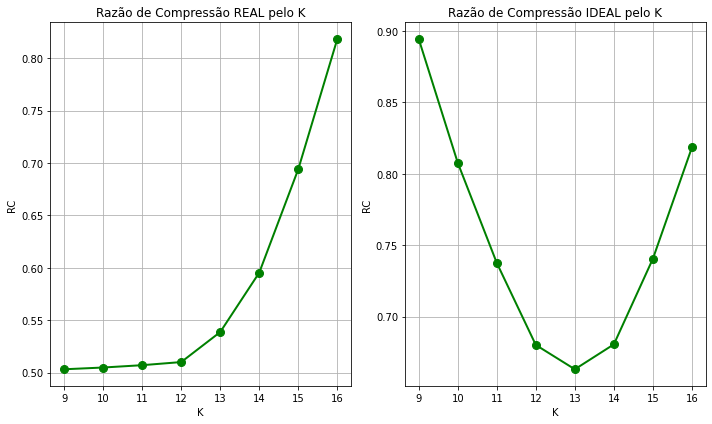

In [21]:
# Gráfico da razao de compressão Real X K 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
ax[0].plot(k, rc, 'go-', linewidth=2, markersize=8)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].set(xlabel='K', ylabel='RC', title='Razão de Compressão REAL pelo K')
ax[0].grid()

# Gráfico da Razão de Compressão Ideal X K
ax[1].plot(k, rcIdeal, 'go-', linewidth=2, markersize=8)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].set(xlabel='K', ylabel='RC', title='Razão de Compressão IDEAL pelo K')
ax[1].grid()

plt.tight_layout()
plt.show()

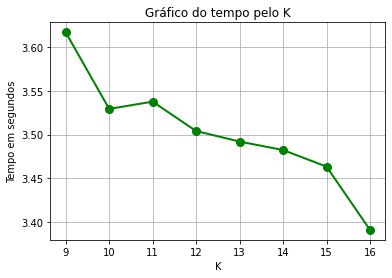

In [22]:
# Gerando gráfico Tempo X K
fig, bx = plt.subplots()
bx.plot(k, tempoProc, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()
plt.show()

In [23]:
# implementação do LZW
# DESCOMPRESSOR
for K in range(9,17):
    arqModificado = open("saidaCompressao\saidaComprimida" + str(K) + ".mp4", "rb").read()
    msgInt = []
    newKey = 256
    comeco = time.time()
    descomprimida = ''
    dicionario = {}
    
    for i in range(0,len(arqModificado),2):
        arr = bytearray([arqModificado[i],arqModificado[i+1]])
        msgInt.append(struct.unpack('H', arr)[0])

    for i in range(2**8):
        dicionario[i] = chr(i)  

    for i in tqdm(msgInt):
        if len(dicionario) <= 2**K:
            # update do elemento anterior
            if newKey > 256:   
                dicionario[newKey-1] += dicionario[i][0]
        descomprimida += dicionario[i]
        # criação elemento atual 
        dicionario[newKey] = dicionario[i]  
        newKey += 1

    final = time.time()

    outFile = open("saidaDEScompressao\saidaDescomprimida" + str(K) + ".mp4" , "wb")
    for i in descomprimida:
        outFile.write(struct.pack('B', ord(i)))

    tempoProc.append(final-comeco)
    
    print('K = %d  ||  Tamanho: %d -> %d' %(K,len(msgInt),len(descomprimida)))
    print('Tempo %f segundos\n' % (final-comeco))
    print('=======================================================================')

    outFile.close()


100%|██████████| 2097699/2097699 [00:02<00:00, 821225.64it/s]


K = 9  ||  Tamanho: 2097699 -> 2111047
Tempo 4.357742 segundos



100%|██████████| 2090702/2090702 [00:02<00:00, 835257.53it/s]


K = 10  ||  Tamanho: 2090702 -> 2111047
Tempo 4.282063 segundos



100%|██████████| 2081530/2081530 [00:02<00:00, 822467.63it/s]


K = 11  ||  Tamanho: 2081530 -> 2111047
Tempo 4.297838 segundos



100%|██████████| 2069378/2069378 [00:02<00:00, 829173.15it/s]


K = 12  ||  Tamanho: 2069378 -> 2111047
Tempo 4.241992 segundos



100%|██████████| 1959288/1959288 [00:02<00:00, 789387.31it/s]


K = 13  ||  Tamanho: 1959288 -> 2111047
Tempo 4.155710 segundos



100%|██████████| 1772621/1772621 [00:02<00:00, 769231.39it/s]


K = 14  ||  Tamanho: 1772621 -> 2111047
Tempo 3.829540 segundos



100%|██████████| 1520385/1520385 [00:02<00:00, 691594.56it/s]


K = 15  ||  Tamanho: 1520385 -> 2111047
Tempo 3.553081 segundos



100%|██████████| 1289578/1289578 [00:01<00:00, 665499.96it/s]


K = 16  ||  Tamanho: 1289578 -> 2111047
Tempo 3.072433 segundos



In [24]:
for i in tqdm(range(len(arqOriginal))):
    if(arqOriginal[i] != descomprimida[i]):
        string = arqOriginal[i-1] + arqOriginal[i] + arqOriginal[i+1]
        string2 = descomprimida[i-1] + arqOriginal[i] + arqOriginal[i+1]
        print(string, " ", string2)

100%|██████████| 2111047/2111047 [00:00<00:00, 2187748.80it/s]


In [25]:
filecmp.cmp('disco.mp4', "saidaDEScompressao\saidaDescomprimida16.mp4")

True